In [1]:
import numpy as np
from sklearn.metrics import pairwise_distances

In [2]:
def entropy(p):
    """Calculates 2 ** H(p) of array p, where H(p) is the shannon entropy"""
    return 2 ** np.sum(-p*np.log2(p))

In [3]:
def get_pji(D, sigma, i):
    """
    Takes the row of a distance matrix D and sigma, and returns a row of conditional probabilities j given i
    
    Inputs:
        D - 1xN row vector from a pairwise distance matrix D
        sigma - std of a guassian used for conditional probabilities
        
    Output:
        pj_i - 1xN vector 
    """
    
    scale = 2*sigma**2
        
    D_scaled = -D.copy()/scale
    D_scaled -= np.max(D_scaled)
    exp_D = np.exp(D_scaled)
    exp_D[i] = 0
    
    return exp_D/np.sum(exp_D)

In [4]:
def binary_search(fx, fscore, val, lb=0, ub=1e4, tol=1e-6, maxit=250):
    """
    Executes binary search to find the input to fx along with x such that its output yields score given by fscore
    where |score - val| < tol.
    
    Inputs:
        fx ~ function to be paramterized for val
        fscore ~ function that gives score of fx
        val ~ desired score
        lb  ~ lower bound for search
        ub  ~ upper bound for search
        tol ~ tolerance
        maxit ~ maximum number of iterations
        
    Output:
        midpoint ~ value such that the score of fx is within given tolerance of val
    
    """
    
    for i in range(maxit):
        midpoint = (lb + ub)/2
        
        y = fx(midpoint)
        score = fscore(y[y!=0])
        
        if score < val:
            lb = midpoint
        else:
            ub = midpoint

        if np.abs(score-val) < tol:
                return midpoint 
        
    return midpoint

In [5]:
def get_P(X, perp, lb=0, ub=1e4, tol=1e-6, maxit=250):
    """
    Generates NxN symmetric affinity score matrix for a data matrix X
    
    Input:
        X ~  NxM data matrix 
        perp ~ perplexity score used to obtain sigmas for conditional probabilies pj_i
        lb ~ lower bound in binary search used to obtain sigma for conditional probabilies pj_i
        ub ~ upper bound in binary search used to obtain sigma for conditional probabilies pj_i
        tol ~ tolerance in binary search used to obtain sigma for conditional probabilies pj_i
        maxit ~ maximum number of iterations in binary search used to obtain sigma 
                for conditional probabilies pj_i
                
    Output:
        P ~ NxN symmetric affinity score matrix 
    """
    
    N = X.shape[0]
    D = pairwise_distances(X, metric="sqeuclidean")
    
    P = np.zeros((N,N))
    
    for i in range(N):
        f = lambda x: get_pji(D[i, :], sigma=x, i = i)
        sig = binary_search(fx = f, fscore = entropy, val=perp, lb=lb, ub=ub, tol=tol, maxit=maxit)
        P[i, :] = get_pji(D[i,:], sig, i = i)
        
    
    return (P + P.T) / (2*N)
    

### Testing on Simulated Data

In [6]:
np.random.seed(1234)
n = 500
p = 5
X = np.r_[np.random.normal(-2, 1/2, [n//2, p]), np.random.normal(2, 1/2, [n//2, p])]

In [7]:
Pt = get_P(X, perp=30)

In [8]:
Pt

array([[0.00000000e+000, 3.41696774e-008, 4.90078522e-007, ...,
        1.43743914e-116, 1.63072790e-122, 1.72368813e-155],
       [3.41696774e-008, 0.00000000e+000, 1.72588721e-007, ...,
        1.98677286e-123, 1.17738720e-122, 4.52099400e-125],
       [4.90078522e-007, 1.72588721e-007, 0.00000000e+000, ...,
        4.53598689e-116, 2.17914808e-095, 3.07697548e-099],
       ...,
       [1.43743914e-116, 1.98677286e-123, 4.53598689e-116, ...,
        0.00000000e+000, 1.14976497e-011, 1.19842426e-008],
       [1.63072790e-122, 1.17738720e-122, 2.17914808e-095, ...,
        1.14976497e-011, 0.00000000e+000, 2.19846957e-006],
       [1.72368813e-155, 4.52099400e-125, 3.07697548e-099, ...,
        1.19842426e-008, 2.19846957e-006, 0.00000000e+000]])

In [9]:
import matplotlib.pyplot as plt

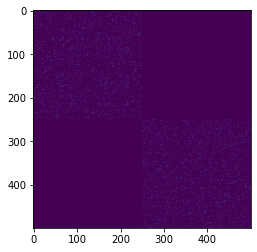

In [10]:
plt.imshow(Pt)
pass